In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS



# First import the dataset and preview the data, the data is about the words that every philosophers said. I want to find out which words they said more often.

In [85]:
df=pd.read_csv("C:/Users/Zero/Documents/GitHub/Fall2021-Project1-yule-yueli/data/philosophy_data.csv")

In [86]:
df.head(n=10)

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   
5  Plato - Complete Works  Plato  plato   
6  Plato - Complete Works  Plato  plato   
7  Plato - Complete Works  Plato  plato   
8  Plato - Complete Works  Plato  plato   
9  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   
5                       -350                 1997               34   
6                       -350                 1997               43   
7                       -350                 1997               35   
8                       -350                 1997               33   
9                       -350                 1997              147   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   
5                 but someone else has indicted you?   
6        i do not really know him myself, euthyphro.   
7                he is apparently young and unknown.   
8                  they call him meletus, i believe.   
9  he belongs to the pitthean deme, if you know a...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   
5  ['but', 'someone', 'else', 'has', 'indicted', ...   
6  ['do', 'not', 'really', 'know', 'him', 'myself...   
7  ['he', 'is', 'apparently', 'young', 'and', 'un...   
8      ['they', 'call', 'him', 'meletus', 'believe']   
9  ['he', 'belongs', 'to', 'the', 'pitthean', 'de...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PR

# Here is the version of jupyter notebook

In [87]:
import sys
print(sys.version)
print(sys.executable)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
C:\Users\Zero\Anaconda3\python.exe


# Creat a new variable called n_txt（number of tokenized_txt) and find out the number of valid words in every sentence.

In [88]:
df['n_txt'] = list(map(len,map(eval,df.tokenized_txt)))

# Then preview the new dataset

In [89]:
df.head(n=10)

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   
5  Plato - Complete Works  Plato  plato   
6  Plato - Complete Works  Plato  plato   
7  Plato - Complete Works  Plato  plato   
8  Plato - Complete Works  Plato  plato   
9  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   
5                       -350                 1997               34   
6                       -350                 1997               43   
7                       -350                 1997               35   
8                       -350                 1997               33   
9                       -350                 1997              147   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   
5                 but someone else has indicted you?   
6        i do not really know him myself, euthyphro.   
7                he is apparently young and unknown.   
8                  they call him meletus, i believe.   
9  he belongs to the pitthean deme, if you know a...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   
5  ['but', 'someone', 'else', 'has', 'indicted', ...   
6  ['do', 'not', 'really', 'know', 'him', 'myself...   
7  ['he', 'is', 'apparently', 'young', 'and', 'un...   
8      ['they', 'call', 'him', 'meletus', 'believe']   
9  ['he', 'belongs', 'to', 'the', 'pitthean', 'de...   

                                      lemmatized_str  n_txt  
0     what be new , Socrates , to make -PRON- lea...     23  
1   surely -PRON- be not prosecute anyone before ...     12  
2   the Athenians do not call this a prosecution ...     11  
3                          what be this -PRON- say ?      5

# First see the distributions of 3 categories:title, author, school.

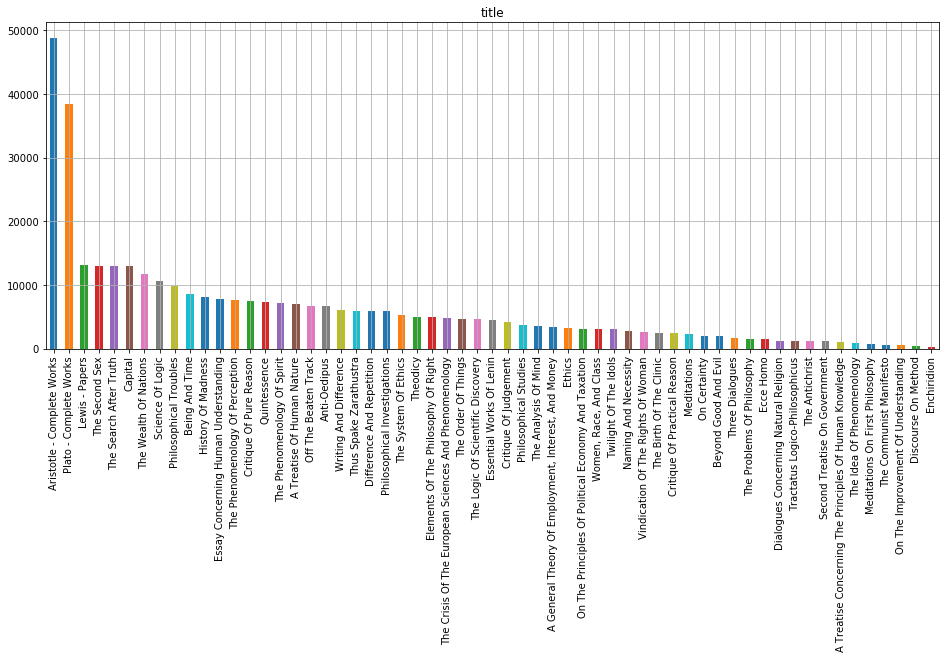

In [90]:
plt.figure(figsize=(16,6))
df['title'].value_counts().plot(kind='bar')
plt.title('title')
plt.grid()
plt.show()

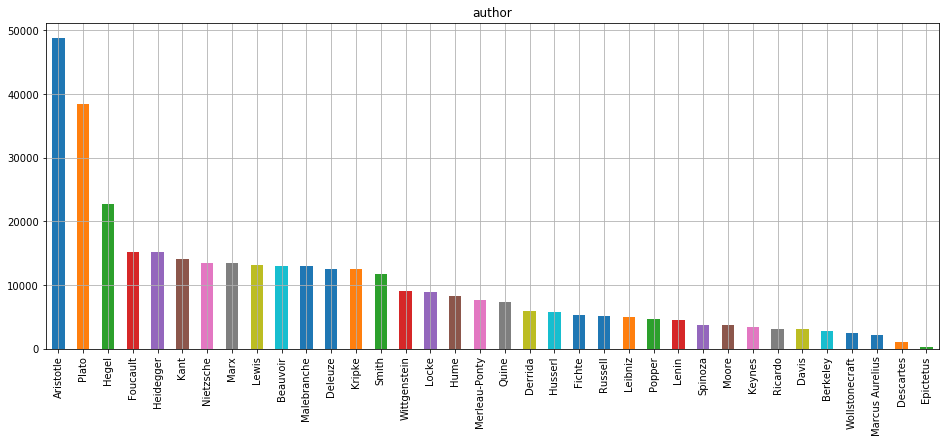

In [91]:
plt.figure(figsize=(16,6))
df['author'].value_counts().plot(kind='bar')
plt.title('author')
plt.grid()
plt.show()



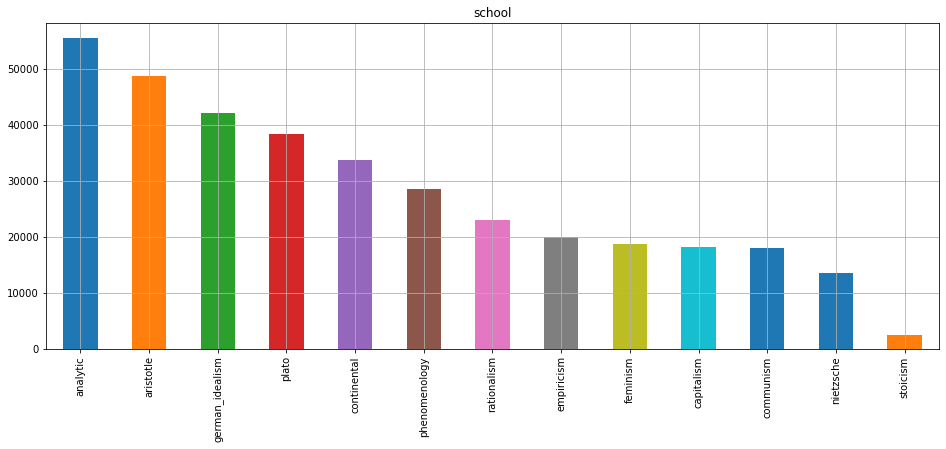

In [92]:
plt.figure(figsize=(16,6))
df['school'].value_counts().plot(kind='bar')
plt.title('school')
plt.grid()
plt.show()

# Histgram of n_txt, the distribution of n_txt is right skewed

count    360808.000000
mean         25.693216
std          17.766261
min           0.000000
25%          13.000000
50%          22.000000
75%          34.000000
max         398.000000
Name: n_txt, dtype: float64


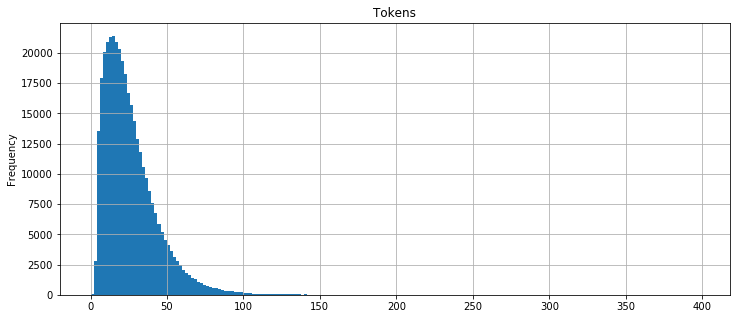

In [93]:
print(df.n_txt.describe())

plt.figure(figsize=(12,5))
df.n_txt.plot(kind='hist', bins=200)
plt.title('Tokens')
plt.grid()
plt.show()

# violin plot about n_txt by schools: approximately same means

C:\Users\Zero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


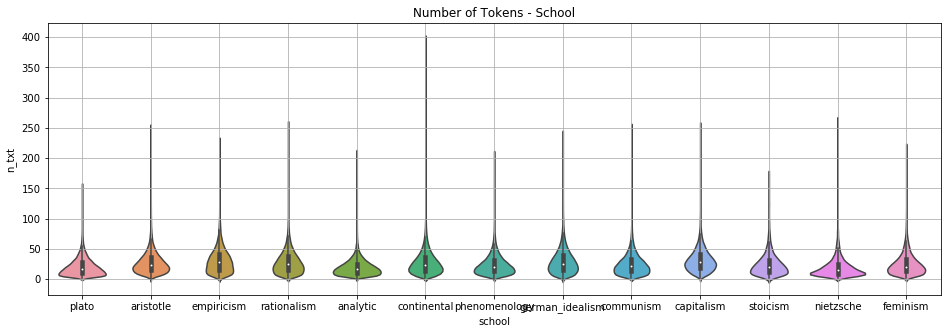

In [94]:
plt.figure(figsize=(16,5))
sns.violinplot(x='school', y='n_txt', data=df)
plt.title('Number of Tokens - School')
plt.grid()
plt.show()

# WordClouds by school

In [95]:
stopwords = set(STOPWORDS)

School =  PLATO :


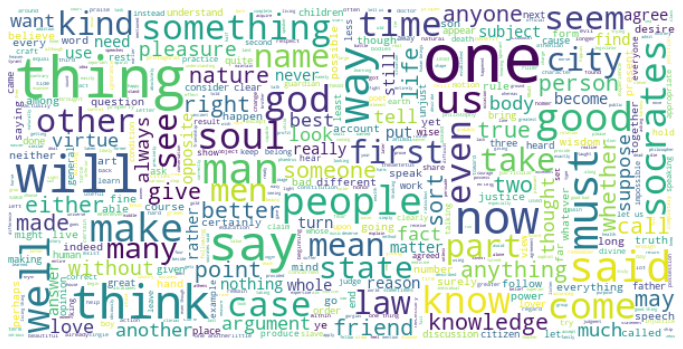

School =  ARISTOTLE :


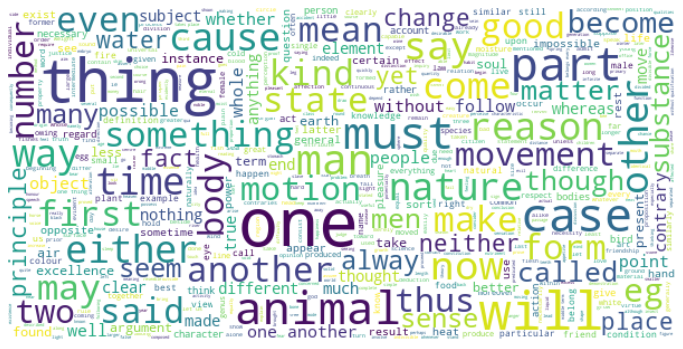

School =  EMPIRICISM :


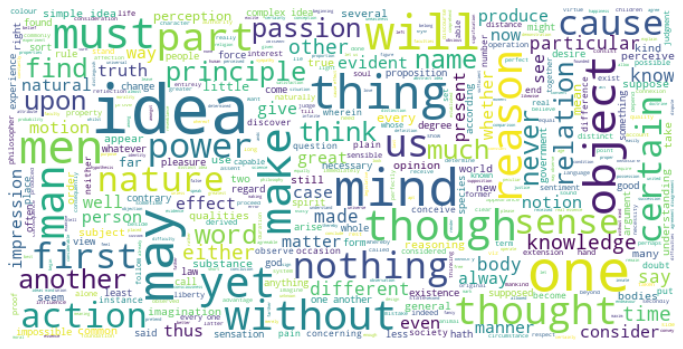

School =  RATIONALISM :


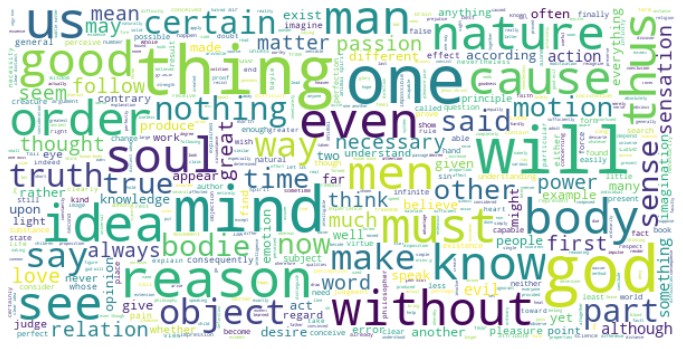

School =  ANALYTIC :


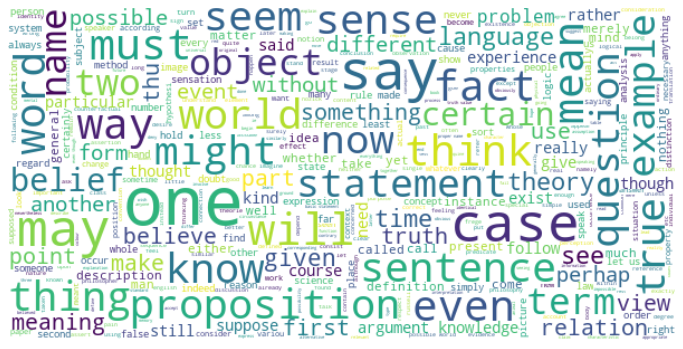

School =  CONTINENTAL :


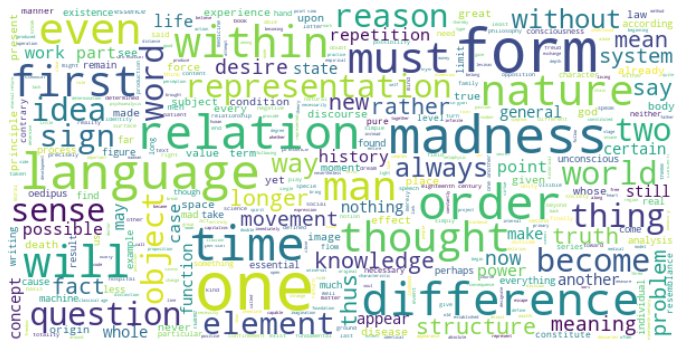

School =  PHENOMENOLOGY :


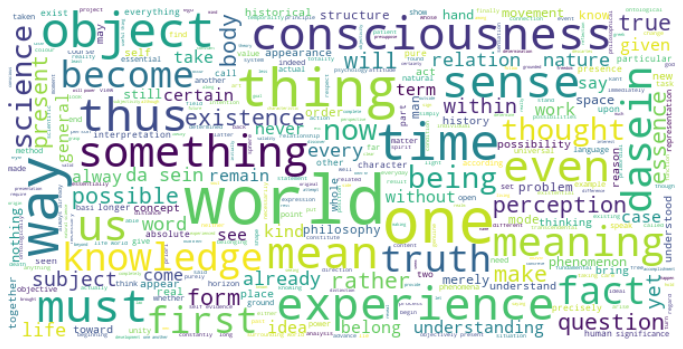

School =  GERMAN_IDEALISM :


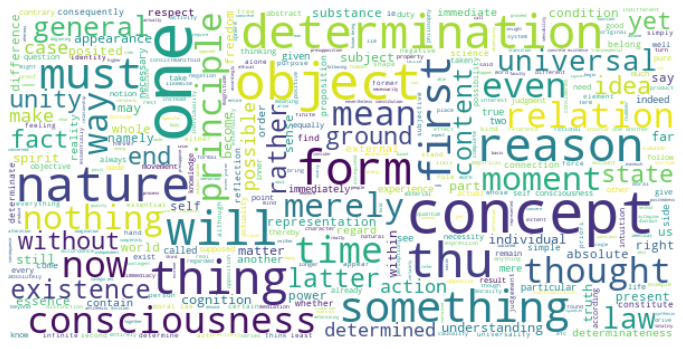

School =  COMMUNISM :


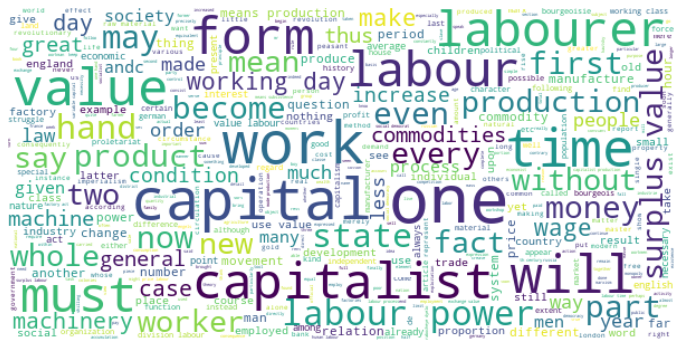

School =  CAPITALISM :


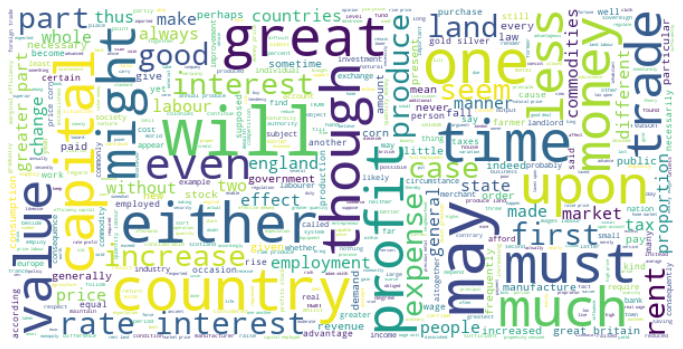

School =  STOICISM :


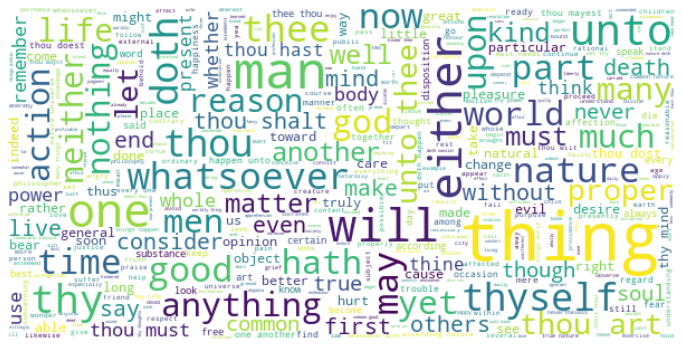

School =  NIETZSCHE :


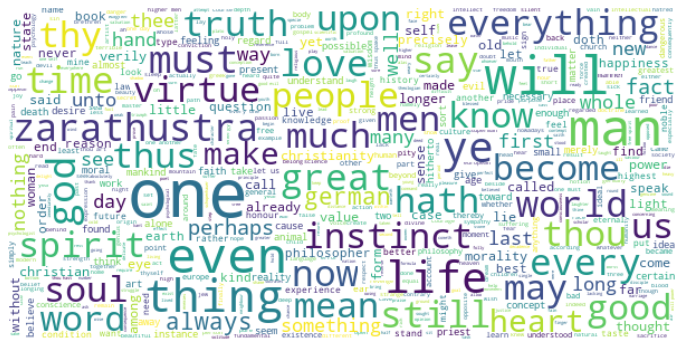

School =  FEMINISM :


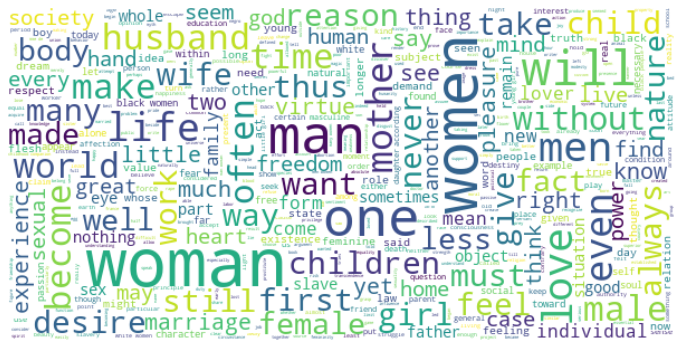

In [96]:
schools = df.school.unique().tolist()
for sc in schools:
    df_temp = df[df.school==sc]
    
    print('School = ', sc.upper(), ':')
    
    # render wordcloud
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=60, max_words=600,
                          width = 600, height = 300,
                          background_color="white").generate(text)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# conclusion:
# 1.Different schools have the same means of numbers of valid words in every sentence.
# 2. The words said often by different schools:
# PLATO: Think, Socrates,.
# ARISTOTLE: Animal, Nature..
# EMPIRICISM: Idea, Mind
# RATIONALISM: Reason, Mind..
# ANALYTIC: Fact, Proposition..
# CONTINENTAL: Language, Relation..
# PHENOMENOLOGY: Consciousness, Experience..
# GERMAN_IDEALISM: Concept, Determination..
# COMMUNISM: Capital, Labour..
# CAPITALISM: Country, Profit..
# STOICISM: Thyself, God..
# NIETZSCHE: Instinct, Love..
# FEMINISM: Life, Woman..
